## Simple Linear Regression

In [2]:
from warnings import filterwarnings
filterwarnings ('ignore')

## Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Perform basic data quality check

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

0

### PROFIT ~ RND
### PROFIT_pred = B0 + B1xRND

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

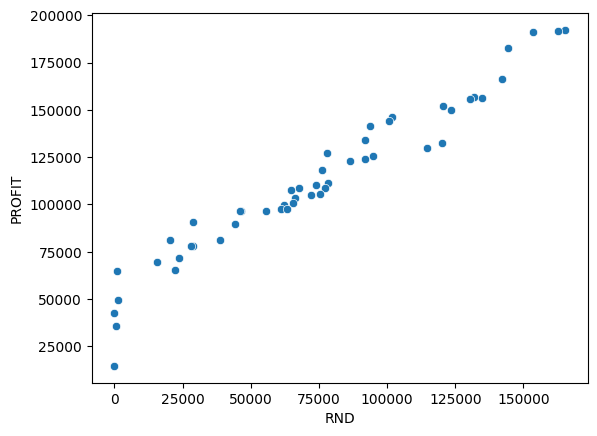

In [13]:

sns.scatterplot(data=df, x='RND', y='PROFIT')
plt.show()

### Seperate X and Y features

In [14]:
X = df[['RND']]
Y = df[['PROFIT']]

In [15]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [16]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Creating a Linear Regtression Model

In [17]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### Check intercept and coefficient

In [18]:
model.intercept_

array([49032.89914125])

In [19]:
model.coef_

array([[0.85429137]])

### PROFIT_pred = 49032.8991 + 0.8543xRND


1.If RND budget is 0 then PROFIT estimated is 49032.8991

2.If RND budget increases by 1000 the profit increases by 854.3

### Visualize the line to fit

[]

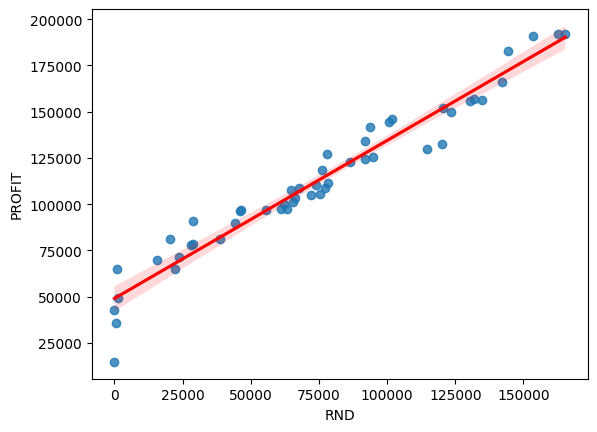

In [20]:
sns.regplot(data=df, x='RND', y='PROFIT', line_kws={'color':'red'})
plt.plot()

### Estimating profit for out of sample data

In [22]:
X.values

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [23]:
rnd = [[80000]]
profit_pred = model.predict(rnd)
profit_pred

array([[117376.20881636]])

### Evaluating the model
1. Mean Squaraed Error
2. Root Mean Squared Error
3. Mean Absolute Error
4. Mean Absolute Percentage Error
5. R2 Score


In [25]:
# R2 score
model.score(X,Y)

0.9465353160804393

In [27]:
# Predict the results for tranning data
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [28]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [29]:

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
mse

85120931.32706906

In [30]:

rmse = mse**(1/2)
rmse

9226.100548285232

In [31]:

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
mae

6910.98435457961

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.11070141081984847

In [33]:

from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
r2

0.9465353160804393

### PROFIT and RND have strong Linear Relationship,
Reliablity of fit is 94.65% hence this is a good model